In [17]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random
import pickle
from sklearn.preprocessing import normalize

class SOM:
    def __init__(self, size, input_dimensions):
        self.size = size
        self.input_dimensions = input_dimensions
        self.nodes = np.array([[Node(self.input_dimensions) for i in range(size)] for j in range(size)])
        
    def fit(self, data, epochs, learning_rate = 0.1):
        initial_radius = self.size/2
        radius = initial_radius

        epochs_data = []
        for epoch in range(epochs):
            vector = data[random.randrange(0, len(data))]
            bmu_index = self.find_bmu_index(vector)

            epoch_data = [[None] * self.size] * self.size
            for row_index, row in enumerate(self.nodes):
                for column_index, node in enumerate(row):
                    epoch_data[row_index][column_index] = node.get_weights()
                    distance = math.hypot(bmu_index["row"] - row_index, bmu_index["column"] - column_index)
                    if distance <= radius:
                        influence = math.exp(-distance/(2*radius**2))
                        node.adjust_weights(vector, influence, learning_rate)
            epochs_data.append(epoch_data)
            radius = initial_radius * math.exp(-epoch/(epochs/math.log(initial_radius)))

        with open('epochs.pickle', 'wb') as dump_file:
            pickle.dump(epochs_data, dump_file)


    def find_bmu_index(self, vector):
        bmu_index = {"row": 0, "column": 0}
        smallest_distance = self.input_dimensions # For normalised data max distance for an element is 1
        for row_index, row in enumerate(self.nodes):
            for column_index, node in enumerate(row):
                distance = node.get_euclidean_distance(vector)
                if distance < smallest_distance:
                    smallest_distance = distance
                    bmu_index = {"row": row_index, "column": column_index}
        return bmu_index
    
    def display_weights(self):
        w, h = self.size, self.size
        data = np.zeros((h, w, 3), dtype=np.uint8)
        for row_index, row in enumerate(self.nodes):
            for column_index, node in enumerate(row):
                data[row_index, column_index] = node.get_weights()*255
        plt.imshow(data, interpolation='nearest')
        plt.show()
        
class Node:
    def __init__(self, input_dimensions):
        self.weights = np.random.rand(input_dimensions)
        
    def get_euclidean_distance(self, vector):
        return np.linalg.norm(self.weights - vector)
    
    def adjust_weights(self, vector, influence, learning_rate):
        for i in range(len(self.weights)):
            self.weights[i] += (vector[i] - self.weights[i]) * influence * learning_rate
            
    def get_weights(self):
        return self.weights
    
print(1)

1


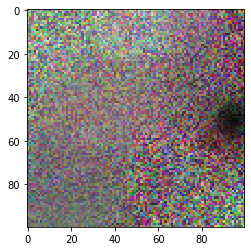

1


In [20]:
with open('dataset.pickle', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
    content = list(map(lambda p:(x:=p[0], y:=p[1], z:=p[2], (x/10, y/10, z/10))[-1], content))
    som = SOM(100, 3)
    som.fit(content, 100)
    som.display_weights()
    
print(1)
    
    



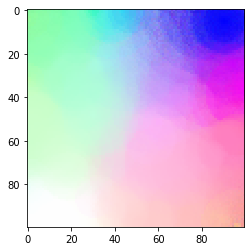

1


In [7]:
with open('dataset.pickle', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
    content = normalize(content, norm="max")
    som = SOM(100, 3)
    som.fit(content, 1000)
    som.display_weights()
    
print(1)
    
    

            

        
    
        